# Convert SQL to NoSQL and Social Media

### ABSTRACT

I am working on converting an SQL database to NoSQL without any loss of data. The dataset used is Anime and MongoDB will be used for NoSQL. Also, data related to our dataset will be retrieved from Twitter by interacting with Twitter API and interesting findings will be made by querying the database.

### DATA has been taken from the following source:

* CSV files

### DATA acquired from CSV files

In [53]:
# importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pymongo
import json

In [17]:
#Reading data from csv file which includes anime details
dataframe_entire = pd.read_csv("animelist.csv",encoding='latin1')
dataframe_entire

,title,type,source,episodes,status,rating,background,producer,studio,duration_min,aired_from_year,genre
0,Inu x Boku SS,TV,Manga,12,Finished Airing,PG-13 - Teens 13 or older,Inu x Boku SS was licensed by Sentai Filmworks...,Aniplex,David Production,24.0,2012,Comedy
1,Seto no Hanayome,TV,Manga,26,Finished Airing,PG-13 - Teens 13 or older,NaN,TV Tokyo,Gonzo,24.0,2007,Comedy
2,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,PG - Children,NaN,TV Tokyo,Satelight,24.0,2008,Comedy
3,Princess Tutu,TV,Original,38,Finished Airing,PG-13 - Teens 13 or older,Princess Tutu aired in two parts. The first pa...,Memory-Tech,Hal Film Maker,16.0,2002,Comedy
4,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,PG-13 - Teens 13 or older,NaN,NHK,J.C.Staff,24.0,2012,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
724,Busou Shinki Moon Angel,ONA,Other,10,Finished Airing,PG-13 - Teens 13 or older,NaN,NaN,"TNK, Kinema Citrus",5.0,2011,Action
725,Nagi no Asukara,TV,Original,26,Finished Airing,PG-13 - Teens 13 or older,Episode 1 was previewed at a screening in Toky...,Geneon Universal Entertainment,P.A. Works,23.0,2013,Drama
726,Tenjou Tenge: The Past Chapter,Movie,Manga,1,Finished Airing,R - 17+ (violence & profanity),NaN,NaN,Madhouse,92.0,2005,Adventure
727,Shisha no Teikoku,Movie,Novel,1,Finished Airing,R - 17+ (violence & profanity),Winner of the Platinum Grand Prize during the ...,NaN,Wit Studio,120.0,2015,Sci-Fi


## Entity Relatonship Diagram

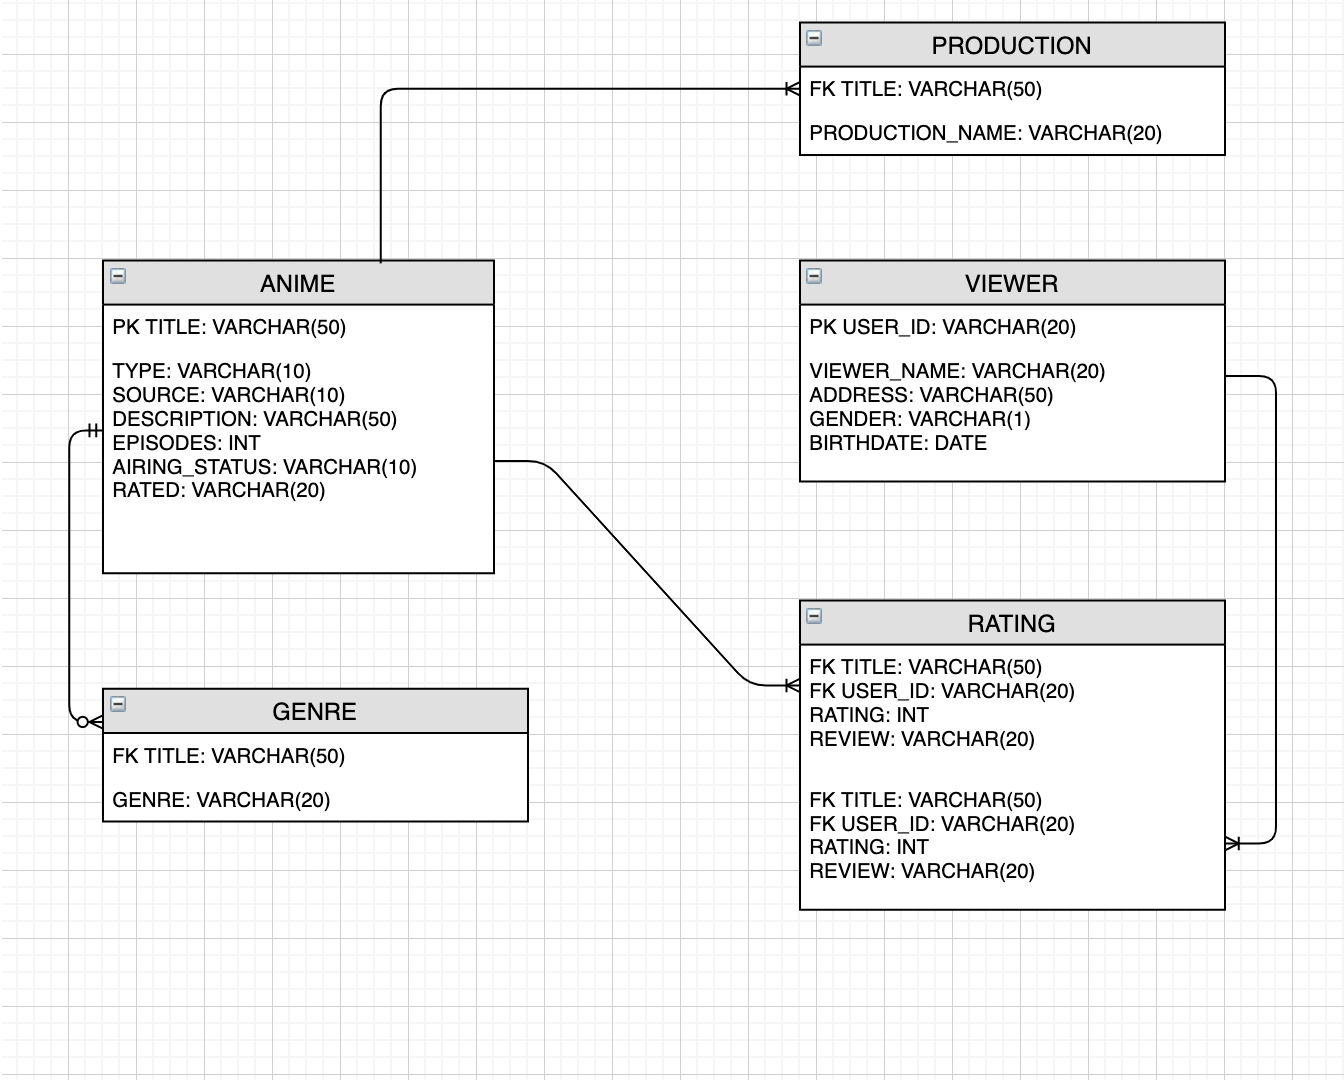

In [19]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment3/Images/ER.png")

## Entities being saved in MongoDB

### Anime

In [20]:
# inserting data in MongoDB 
from pymongo import MongoClient 

try: 
    conn = MongoClient('localhost', 27017)
    print("Connected successfully!!!") 
except: 
    print("Could not connect to MongoDB") 

# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.animecollection 
 
#Iterating over the complete anime details and generating Anime Table
df1 = dataframe_entire.iloc[:, [6,7,8,11]]
AnimeTable = dataframe_entire[[col for col in dataframe_entire.columns if col not in df1.columns]]
AnimeTable
 
# Insert Data by converting to JSON
collection.insert_many(AnimeTable.to_dict("records"))

# Printing the data inserted 
data_inserted = collection.find() 
for record in data_inserted: 
    print(record) 


Connected successfully!!!
{'_id': ObjectId('5e8aca021dfb19c32ff3debe'), 'title': 'Inu x Boku SS', 'type': 'TV', 'source': 'Manga', 'episodes': 12, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 24.0, 'aired_from_year': 2012}
{'_id': ObjectId('5e8aca021dfb19c32ff3debf'), 'title': 'Seto no Hanayome', 'type': 'TV', 'source': 'Manga', 'episodes': 26, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 24.0, 'aired_from_year': 2007}
{'_id': ObjectId('5e8aca021dfb19c32ff3dec0'), 'title': 'Shugo Chara!! Doki', 'type': 'TV', 'source': 'Manga', 'episodes': 51, 'status': 'Finished Airing', 'rating': 'PG - Children', 'duration_min': 24.0, 'aired_from_year': 2008}
{'_id': ObjectId('5e8aca021dfb19c32ff3dec1'), 'title': 'Princess Tutu', 'type': 'TV', 'source': 'Original', 'episodes': 38, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 16.0, 'aired_from_year': 2002}
{'_id': ObjectId('5e8aca021dfb1

{'_id': ObjectId('5e8aca021dfb19c32ff3dee3'), 'title': 'Saiunkoku Monogatari 2nd Season', 'type': 'TV', 'source': 'Light novel', 'episodes': 39, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 25.0, 'aired_from_year': 2007}
{'_id': ObjectId('5e8aca021dfb19c32ff3dee4'), 'title': 'InuYasha', 'type': 'TV', 'source': 'Manga', 'episodes': 167, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 24.0, 'aired_from_year': 2000}
{'_id': ObjectId('5e8aca021dfb19c32ff3dee5'), 'title': 'Chu-Bra!!', 'type': 'TV', 'source': 'Manga', 'episodes': 12, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 24.0, 'aired_from_year': 2010}
{'_id': ObjectId('5e8aca021dfb19c32ff3dee6'), 'title': 'Nodame Cantabile Finale', 'type': 'TV', 'source': 'Manga', 'episodes': 11, 'status': 'Finished Airing', 'rating': 'PG-13 - Teens 13 or older', 'duration_min': 22.0, 'aired_from_year': 2010}
{'_id': ObjectId('5e8aca021dfb

### Production

In [21]:
# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.productioncollection
 
#Iterating over the complete anime details and generating Production Table
ProductionTable = dataframe_entire.iloc[:, [0,7,8]]
ProductionTable
 
# Insert Data by converting to JSON
collection.insert_many(ProductionTable.to_dict("records"))

# Printing the data inserted 
data_inserted1 = collection.find() 
for record in data_inserted1: 
    print(record)

{'_id': ObjectId('5e8aca201dfb19c32ff3e197'), 'title': 'Inu x Boku SS', 'producer': 'Aniplex', 'studio': 'David Production'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e198'), 'title': 'Seto no Hanayome', 'producer': 'TV Tokyo', 'studio': 'Gonzo'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e199'), 'title': 'Shugo Chara!! Doki', 'producer': 'TV Tokyo', 'studio': 'Satelight'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e19a'), 'title': 'Princess Tutu', 'producer': 'Memory-Tech', 'studio': 'Hal Film Maker'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e19b'), 'title': 'Bakuman. 3rd Season', 'producer': 'NHK', 'studio': 'J.C.Staff'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e19c'), 'title': 'Yume-iro Pätissiðre', 'producer': 'Yomiuri Telecasting', 'studio': 'Studio Pierrot, Studio Hibari'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e19d'), 'title': 'Ultra Maniac', 'producer': 'WAO World', 'studio': 'Production Reed'}
{'_id': ObjectId('5e8aca201dfb19c32ff3e19e'), 'title': 'Shakugan no Shana II (Second)', 'producer': 'Gene

### Genre

In [22]:
# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.genrecollection
 
#Iterating over the complete anime details and generating Genre Table
GenreTable = dataframe_entire.iloc[:, [0,11]]
GenreTable
 
# Insert Data by converting to JSON
collection.insert_many(GenreTable.to_dict("records"))

# Printing the data inserted 
data_inserted = collection.find() 
for record in data_inserted: 
    print(record)

{'_id': ObjectId('5e8aca341dfb19c32ff3e470'), 'title': 'Inu x Boku SS', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e471'), 'title': 'Seto no Hanayome', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e472'), 'title': 'Shugo Chara!! Doki', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e473'), 'title': 'Princess Tutu', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e474'), 'title': 'Bakuman. 3rd Season', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e475'), 'title': 'Yume-iro Pätissiðre', 'genre': 'Kids'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e476'), 'title': 'Ultra Maniac', 'genre': 'Magic'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e477'), 'title': 'Shakugan no Shana II (Second)', 'genre': 'Action'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e478'), 'title': 'Nodame Cantabile: Paris-hen', 'genre': 'Music'}
{'_id': ObjectId('5e8aca341dfb19c32ff3e479'), 'title': 'Ouran Koukou Host Club', 'genre': 'Comedy'}
{'_id': ObjectId('5e8aca341dfb19c32f

### Viewer

In [23]:
# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.viewercollection
 
#Reading data from csv file which includes viewers details
ViewerTable = pd.read_csv("viewerslist.csv",encoding='latin1')
ViewerTable
 
# Insert Data by converting to JSON
collection.insert_many(ViewerTable.to_dict("records"))

# Printing the data inserted 
data_inserted = collection.find() 
for record in data_inserted: 
    print(record)

{'_id': ObjectId('5e8aca3e1dfb19c32ff3e749'), 'user_id': 'user1', 'username': 'karthiga', 'gender': 'Female', 'birth_date': '4/29/90', 'location': 'Chennai'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74a'), 'user_id': 'user2', 'username': 'RedvelvetDaisuki', 'gender': 'Female', 'birth_date': '1/1/95', 'location': 'Manila'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74b'), 'user_id': 'user3', 'username': 'Damonashu', 'gender': 'Male', 'birth_date': '8/1/91', 'location': 'Detroit'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74c'), 'user_id': 'user4', 'username': 'bskai', 'gender': 'Male', 'birth_date': '12/14/90', 'location': 'Nayarit'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74d'), 'user_id': 'user5', 'username': 'terune_uzumaki', 'gender': 'Female', 'birth_date': '8/24/98', 'location': 'Malaysia'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74e'), 'user_id': 'user6', 'username': 'Bas_G', 'gender': 'Male', 'birth_date': '10/24/99', 'location': 'Nijmegen'}
{'_id': ObjectId('5e8aca3e1dfb19c32ff3e74f'), 'u

### Rating

In [24]:
# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.ratingcollection

#Reading data from csv file which includes Rating details
RatingTable = pd.read_csv("ratinglist.csv",encoding='latin1')
RatingTable
 
# Insert Data by converting to JSON
collection.insert_many(RatingTable.to_dict("records"))

# Printing the data inserted 
data_inserted = collection.find() 
for record in data_inserted: 
    print(record)

{'_id': ObjectId('5e8aca461dfb19c32ff3eb93'), 'userid': 'user1', 'title': 'Zombie Clay Animation: Stuck!!', 'Rating': 2}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb94'), 'userid': 'user1', 'title': 'Yami Shibai', 'Rating': 2}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb95'), 'userid': 'user2', 'title': 'Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.', 'Rating': 5}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb96'), 'userid': 'user3', 'title': 'Yuuki Yuuna wa Yuushabu Shozoku 3', 'Rating': 9}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb97'), 'userid': 'user4', 'title': 'Yuu_Yuu_Hakusho: Eizou Hakusho', 'Rating': 6}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb98'), 'userid': 'user4', 'title': 'Xia Lan', 'Rating': 3}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb99'), 'userid': 'user4', 'title': 'Wind: A Breath of Heart (TV)', 'Rating': 4}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb9a'), 'userid': 'user5', 'title': 'Yuru Camp_ Specials', 'Rating': 2}
{'_id': ObjectId('5e8aca461dfb19c32ff3eb9b'

# Retrieving Anime data from social media (Twitter) 

In [31]:
# importing libraries required for downloading data
import tweepy
import twitter

# keys for accesing twitter api
consumerKey = 'lsDkpS786UbLVbxkYOONbeik5'
consumerSecret = 'BhSSMMpwmc6KtFPXWVbzVQezJ1osNthgQHaNDxgrg6TzQhSNUy'
ACCESS_TOKEN = '2483851159-GSH3yLT4Ilon3fD6lfpAYZPRZCaGjP30iAlOQS3'
ACCESS_SECRET = 'j6WQUKvxVSNkKsPMoKv9zrqDvuERqD0sVloCBS1gOT5Vn'

auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [32]:
# Retrieving the tweets with anime hashtag
results = []
search_term = "%anime%"

#Collecting tweets
for tweet in tweepy.Cursor(api.search, q=search_term, since='2019-04-06',until='2020-04-06').items(5000):
            results.append(tweet)
        
results[0]

Status(_api=<tweepy.api.API object at 0x1a24de5550>, _json={'created_at': 'Sun Apr 05 23:59:58 +0000 2020', 'id': 1246950742050684929, 'id_str': '1246950742050684929', 'text': 'RT @blackbuIls: Mfers be like “ my life an anime “ yeah one piece of shit', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'blackbuIls', 'name': '\u200fً', 'id': 1150470440881676289, 'id_str': '1150470440881676289', 'indices': [3, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 771404318524268545, 'id_str': '771404318524268545', 'name': 'A⚡️', 'screen_name': 'anaissalma', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []

In [41]:
def createDataFrame(tweets):

    DF = pd.DataFrame()
    DF['tweetID'] = [tweet.id for tweet in tweets]
    DF['tweetText'] = [tweet.text.encode('utf-8') for tweet in tweets]
    DF['tweetUser'] = [tweet.user.screen_name for tweet in tweets]
    DF['tweetUserLocation'] = [tweet.user.location for tweet in tweets]
    DF['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DF['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DF['hashTags'] = [tweet.entities.get('hashtags') for tweet in tweets]
    
    return DF

#Passing the tweets list to the above function to create a DataFrame
AnimeTweetData = createDataFrame(results)

In [42]:
#Verifying the tweets data with anime
AnimeTweetData.head()


,tweetID,tweetText,tweetUser,tweetUserLocation,tweetRetweetCt,tweetCreated,hashTags
0,1246950742050684929,b'RT @blackbuIls: Mfers be like \xe2\x80\x9c m...,anaissalma,,669,2020-04-05 23:59:58,[]
1,1246950742050643970,b'@sauerclout_ Girl idk who that anime person is',campaaliyah98,,0,2020-04-05 23:59:58,[]
2,1246950741144559616,"b""RT @izukuuu_shonen: Anime who doesn't hesita...",MacLoushien,The Internet,5585,2020-04-05 23:59:58,[]
3,1246950740050030593,b'RT @OliverJia1014: Japan is a country where ...,Wet_Paper,"',:)",4297,2020-04-05 23:59:58,[]
4,1246950738720325632,"b'RT @The5thLeaf: Aht aht, we not tolerating a...",kingfadedz,The Spade Kingdom♠️,5,2020-04-05 23:59:57,[]


In [43]:
def df_to_json(df):
    json_list = df.to_json(orient='records')
    json_list = json.loads(json_list)
    return json_list

AnimeTweetData = df_to_json(AnimeTweetData)

In [44]:
AnimeTweetData[0]

{'tweetID': 1246950742050684929,
 'tweetText': 'RT @blackbuIls: Mfers be like “ my life an anime “ yeah one piece of shit',
 'tweetUser': 'anaissalma',
 'tweetUserLocation': '',
 'tweetRetweetCt': 669,
 'tweetCreated': 1586131198000,
 'hashTags': []}

### Inserting Anime Tweets into MongoDB

In [48]:
# inserting data in MongoDB 
from pymongo import MongoClient 

try: 
    conn = MongoClient('localhost', 27017)
    print("Connected successfully!!!") 
except: 
    print("Could not connect to MongoDB") 

# database 
db = conn.AnimeDatabase 

# Created or Switched to collection  
collection = db.animeTweetsCollection 
 
# Insert Data
for data in AnimeTweetData:
    collection.insert_one(data)

# Printing the data inserted 
data_inserted = collection.find() 
for record in data_inserted: 
    print(record) 

Connected successfully!!!
{'_id': ObjectId('5e8e892a806e8fdd87abe5af'), 'tweetID': 1246950742050684929, 'tweetText': 'RT @blackbuIls: Mfers be like “ my life an anime “ yeah one piece of shit', 'tweetUser': 'anaissalma', 'tweetUserLocation': '', 'tweetRetweetCt': 669, 'tweetCreated': 1586131198000, 'hashTags': []}
{'_id': ObjectId('5e8e892a806e8fdd87abe5b0'), 'tweetID': 1246950742050643970, 'tweetText': '@sauerclout_ Girl idk who that anime person is', 'tweetUser': 'campaaliyah98', 'tweetUserLocation': '', 'tweetRetweetCt': 0, 'tweetCreated': 1586131198000, 'hashTags': []}
{'_id': ObjectId('5e8e892a806e8fdd87abe5b1'), 'tweetID': 1246950741144559616, 'tweetText': "RT @izukuuu_shonen: Anime who doesn't hesitate to kill a character https://t.co/xfiWBtwxSU", 'tweetUser': 'MacLoushien', 'tweetUserLocation': 'The Internet', 'tweetRetweetCt': 5585, 'tweetCreated': 1586131198000, 'hashTags': []}
{'_id': ObjectId('5e8e892a806e8fdd87abe5b2'), 'tweetID': 1246950740050030593, 'tweetText': 'RT @Oli

{'_id': ObjectId('5e8e892c806e8fdd87abeb3a'), 'tweetID': 1246949116984332292, 'tweetText': "Sah j'aurai aimé une meilleure adaptation anime pour cette case mais oklm l'épisode reste INCROYABLE, endeavor my c… https://t.co/whXEROxkEw", 'tweetUser': 'Tsuwerb', 'tweetUserLocation': '', 'tweetRetweetCt': 0, 'tweetCreated': 1586130811000, 'hashTags': []}
{'_id': ObjectId('5e8e892c806e8fdd87abeb3b'), 'tweetID': 1246949116392833024, 'tweetText': '@4eRGHzF7vltmB8c 涼太たん\nおはありー！( ⸝⸝&gt;ᴗ&lt;⸝⸝ )', 'tweetUser': 'anime_umaibo', 'tweetUserLocation': 'たくさんからもぉぉ！！！(⁎˃ᴗ˂⁎)', 'tweetRetweetCt': 0, 'tweetCreated': 1586130811000, 'hashTags': []}
{'_id': ObjectId('5e8e892c806e8fdd87abeb3c'), 'tweetID': 1246949114866290689, 'tweetText': 'RT @IeIouchvi: hi guys i’m new to #anitwt &amp; looking for moots!\n\n‒ code geass\n‒ hxh\n‒ aot\n‒ death note\n‒ fmab\n‒ naruto\n‒ black butler\n‒ 7ds…', 'tweetUser': 'weeby_anime', 'tweetUserLocation': 'P FKN R', 'tweetRetweetCt': 14, 'tweetCreated': 1586130810000, 'hashT

{'_id': ObjectId('5e8e892d806e8fdd87abee0f'), 'tweetID': 1246948264722612226, 'tweetText': '@ShIs_anime_jp 今登校中(´ω｀ )', 'tweetUser': 'dark_choco43130', 'tweetUserLocation': '', 'tweetRetweetCt': 0, 'tweetCreated': 1586130608000, 'hashTags': []}
{'_id': ObjectId('5e8e892d806e8fdd87abee10'), 'tweetID': 1246948264596975617, 'tweetText': 'RT @OliverJia1014: Japan is a country where 98% of the population is ethnically homogenous, yet the stories and characters shown in anime h…', 'tweetUser': 'LuckyHobbitFoot', 'tweetUserLocation': '', 'tweetRetweetCt': 4297, 'tweetCreated': 1586130608000, 'hashTags': []}
{'_id': ObjectId('5e8e892d806e8fdd87abee11'), 'tweetID': 1246948263921582097, 'tweetText': '@FamilyJules7x @AdrianaFigueroa Well my island flag is my anime husbando... does that count?', 'tweetUser': 'michele3241d_', 'tweetUserLocation': '', 'tweetRetweetCt': 0, 'tweetCreated': 1586130607000, 'hashTags': []}
{'_id': ObjectId('5e8e892d806e8fdd87abee12'), 'tweetID': 1246948263451742208, 'twe

{'_id': ObjectId('5e8e892e806e8fdd87abf003'), 'tweetID': 1246947651876196352, 'tweetText': 'RT @Enly_art: ✨A Commission that I made for @ChrisFuschia64 thank you for trusting me for your drawing✨😊❤️\n\n#Commission #commissionsopen #a…', 'tweetUser': 'Lucina211', 'tweetUserLocation': '', 'tweetRetweetCt': 86, 'tweetCreated': 1586130462000, 'hashTags': [{'text': 'Commission', 'indices': [108, 119]}, {'text': 'commissionsopen', 'indices': [120, 136]}]}
{'_id': ObjectId('5e8e892e806e8fdd87abf004'), 'tweetID': 1246947650743742465, 'tweetText': 'Digam me seu anime favorito.', 'tweetUser': 'jousehfinho', 'tweetUserLocation': 'Santos, Brasil', 'tweetRetweetCt': 0, 'tweetCreated': 1586130461000, 'hashTags': []}
{'_id': ObjectId('5e8e892e806e8fdd87abf005'), 'tweetID': 1246947649967788032, 'tweetText': '@Giovanni_Arts_ PUTS, esse dai eu não tenho ideia, real FTDWQFTEQWD.\nO trio de protagonistas era legal e acho que e… https://t.co/dWBbXmukBA', 'tweetUser': 'Makise_Shii', 'tweetUserLocation': 'Br

{'_id': ObjectId('5e8e892f806e8fdd87abf372'), 'tweetID': 1246946663190507521, 'tweetText': 'RT @jluvtway: suka anime = belajar bahas Jepang\nsuka Drakor = belajar bahasa Korea\nsuka drama Thailand = belajar bahasa Thailand\nsuka drama…', 'tweetUser': 'nbilalalaaa', 'tweetUserLocation': 'Jember, Jawa Timur, Indonesia ', 'tweetRetweetCt': 4770, 'tweetCreated': 1586130226000, 'hashTags': []}
{'_id': ObjectId('5e8e892f806e8fdd87abf373'), 'tweetID': 1246946662528024577, 'tweetText': 'RT @BossMinerva_: Se dan cuenta que siempre que está la posibilidad de q sea el fin de nuestra patética existencia al final nunca se da y "…', 'tweetUser': 'Guachipambazo', 'tweetUserLocation': 'Fuminoland', 'tweetRetweetCt': 862, 'tweetCreated': 1586130226000, 'hashTags': []}
{'_id': ObjectId('5e8e892f806e8fdd87abf374'), 'tweetID': 1246946662435581952, 'tweetText': 'RT @cinnamon_sanrio: おはよう！「ファンファンキティ」っていう、お歌とダンスのテレビ番組が始まるんだ！見てくれたらうれしいな♪ https://t.co/xfLqOEVvw8 https://t.co/AtjSmW709F', 'tweetUser': '6028_yyy

{'_id': ObjectId('5e8e8930806e8fdd87abf4b0'), 'tweetID': 1246946318041432067, 'tweetText': 'RT @sugacrumbz: I SEARCH FOR ROMANCE ANIME AND HAIKYUU POPS UP TF IS THIS https://t.co/oA5Cckpxkm', 'tweetUser': 'JanahCandy', 'tweetUserLocation': '', 'tweetRetweetCt': 162, 'tweetCreated': 1586130144000, 'hashTags': []}
{'_id': ObjectId('5e8e8930806e8fdd87abf4b1'), 'tweetID': 1246946317869273089, 'tweetText': 'RT @RainaAsato: if you are black and would like to be drawn as an anime character leave a comment,, please rt if you support black represen…', 'tweetUser': 'skedadddle', 'tweetUserLocation': 'Los Angeles, CA', 'tweetRetweetCt': 19814, 'tweetCreated': 1586130143000, 'hashTags': []}
{'_id': ObjectId('5e8e8930806e8fdd87abf4b2'), 'tweetID': 1246946317760434176, 'tweetText': 'Mi novio me hizo ver anime q vergüenza', 'tweetUser': 'FeerRigoli', 'tweetUserLocation': 'Argentina, Buenos Aires', 'tweetRetweetCt': 0, 'tweetCreated': 1586130143000, 'hashTags': []}
{'_id': ObjectId('5e8e8930806e8fdd87

{'_id': ObjectId('5e8e8931806e8fdd87abf7d1'), 'tweetID': 1246945402701533185, 'tweetText': '@miYabi_hiMemiya おはありー！！', 'tweetUser': 'Sofiaa_anime', 'tweetUserLocation': '', 'tweetRetweetCt': 0, 'tweetCreated': 1586129925000, 'hashTags': []}
{'_id': ObjectId('5e8e8931806e8fdd87abf7d2'), 'tweetID': 1246945402047381507, 'tweetText': 'RT @theSirToasty: sobble is coming to the anime https://t.co/OHe3ztY7Bd', 'tweetUser': 'ItzRangerz', 'tweetUserLocation': 'where ever i am at the time.', 'tweetRetweetCt': 1116, 'tweetCreated': 1586129925000, 'hashTags': []}
{'_id': ObjectId('5e8e8931806e8fdd87abf7d3'), 'tweetID': 1246945401699217410, 'tweetText': 'svegliarsi in un mare di lacrime,\nabitato dalla peggiore delle anime... 🌊', 'tweetUser': 'ilana_fbn', 'tweetUserLocation': 'Metz ', 'tweetRetweetCt': 0, 'tweetCreated': 1586129925000, 'hashTags': []}
{'_id': ObjectId('5e8e8931806e8fdd87abf7d4'), 'tweetID': 1246945401229529090, 'tweetText': '@Alpharad he did it boys. anime', 'tweetUser': 'PlussyGan

### Trending Topics using count of HashTags

In [13]:
# Create a dictionary
d = dict()

# Saving HashTag name and its count in all the tweets and saving as keys and values in a dictionary
for tweet in range(0, len(results)):
    hashTag = results[tweet].entities.get('hashtags')
    for i in range(0, len(hashTag)):
        HashTag = hashTag[i]['text']
        if HashTag in d:
            d[HashTag] = d[HashTag] + 1
        else:
            d[HashTag] = 1

# Dictionary converted to a Dataframe 
HashTag_DF = pd.DataFrame(list(d.items()),columns = ['HashTag','Count'])
HashTag_DF
        

,HashTag,Count
0,ノイエ銀英伝,2
1,more,3
2,members,3
3,discord,3
4,Peaceful,3
...,...,...
485,NightcoreSongs,1
486,NightcoreMix,1
487,is_anime,1
488,forceofwill,1


In [14]:
#Sorting the dataframe as per the count 
HashTag_DF = HashTag_DF.sort_values(by='Count', ascending=False)
HashTag_DF

,HashTag,Count
8,anime,96
7,haikyuu,64
146,AniList,38
57,ギヴン,29
10,BLEACH,26
...,...,...
252,AnimeGifts,1
251,태용,1
250,TAEYONG,1
247,mewmew_new,1


## MongoDB Query 

### Find tweets with any anime name hashtag

QUERY USED:

* db.animeTweetsCollection.find({ tweetText: /Bleach/ }).pretty()

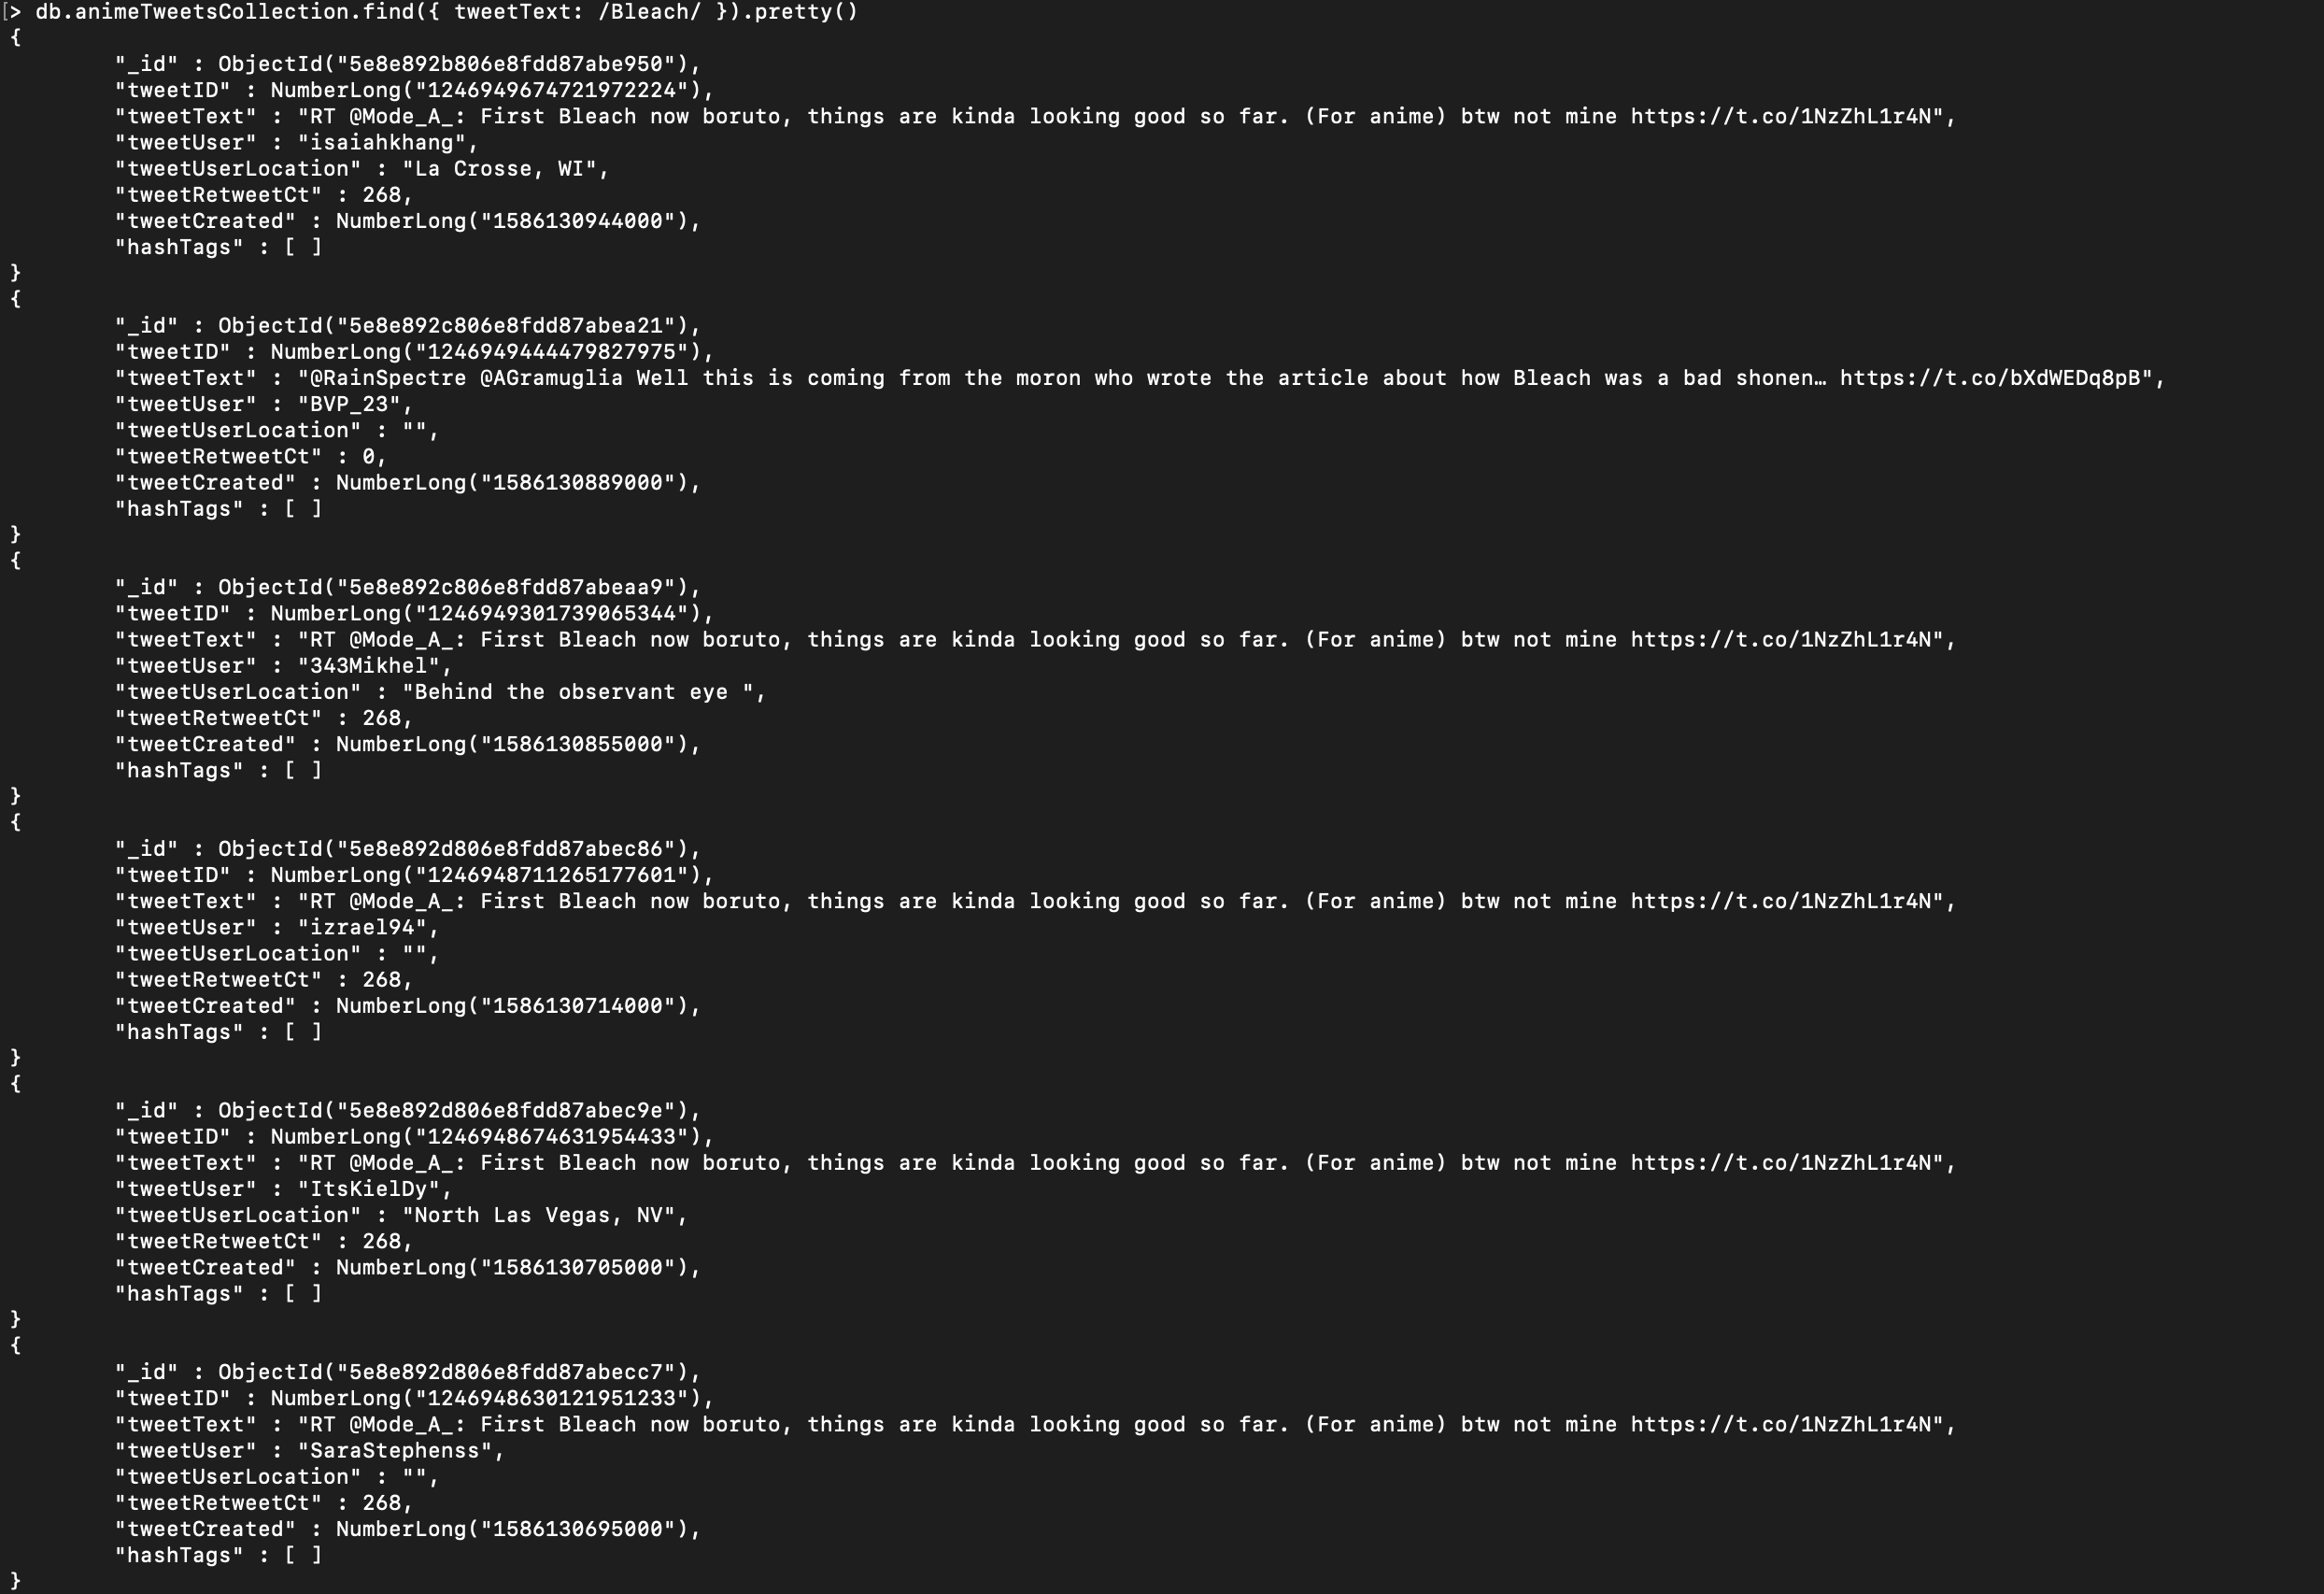

In [49]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment3/Images/hashtag.png")

###  To retrieve top 5 trending topics in the database

QUERY USED:

* db.animeTweetsCollection.aggregate([ { $unwind:'$hashTags'}, {$group:{ _id:'$hashTags.text', tagCount: {$sum: 1}}}, { $sort: { tagCount: -1 }}, { $limit: 5 }]);

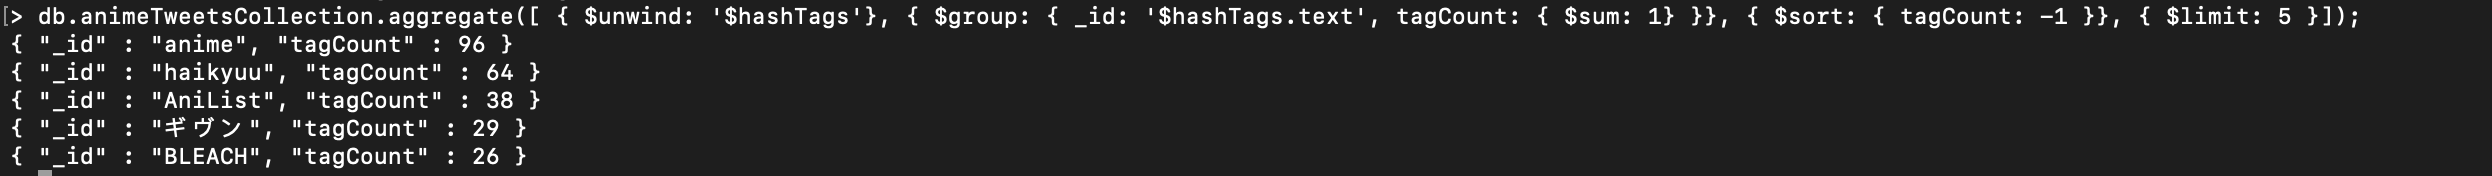

In [50]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment3/Images/Top5Trending.png")

### Popular Tweet

QUERY USED:

* db.animeTweetsCollection.find().sort({ tweetRetweetCt: -1 }).limit(1).pretty()

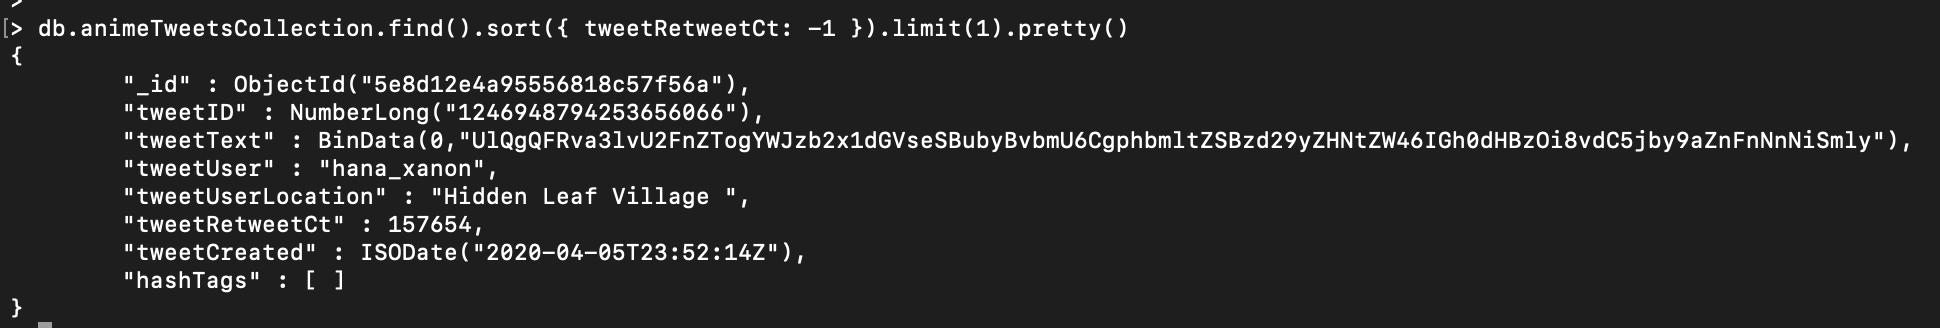

In [51]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment3/Images/PopularTweet.png")

### To find people having similar tweets

QUERY USED:

* db.animeTweetsCollection.find({ tweetText: /#Haikyuu/ }).pretty()

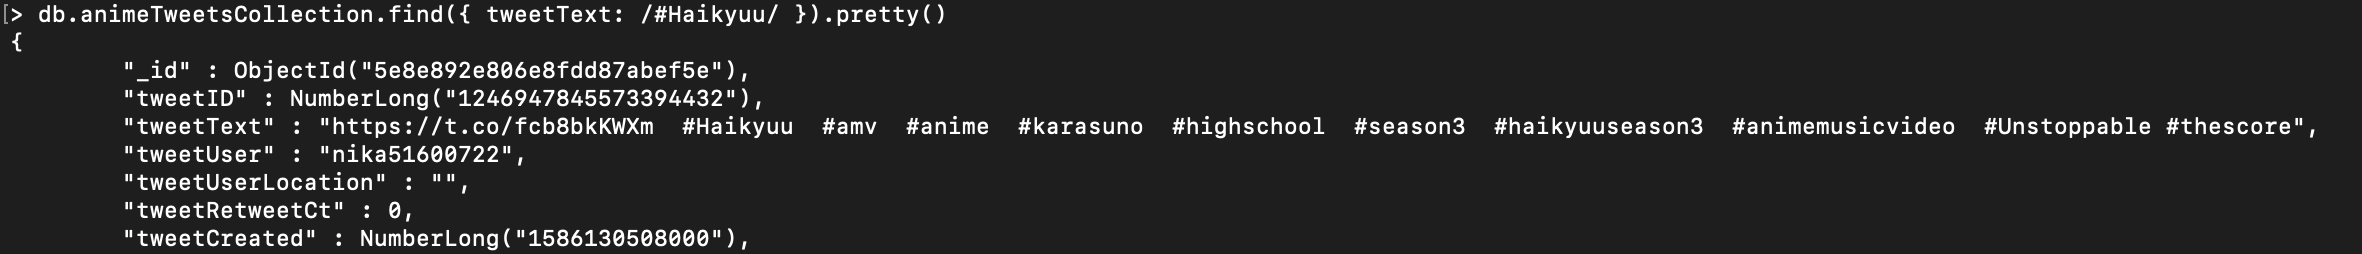

In [52]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment3/Images/similar.png")

### AUDIT VALIDITY/ACCURACY

By using few commands, most of the unwanted null values were deleted from the above rows and columns which gives a report on valid and accuarate data.

### AUDIT COMPLETNESS

In the real world, when a viewer requests for anime, a list of it will be displayed, similarly when we compare it with the above data, we get proper real-time data showing correct information for all the top-rated anime.

### AUDIT CONSISTENCY/UNIFORMITY

The data which has been used in this assignment shows a uniform relationship since they are linked to each other by a common attribute.

## REPORT

### Source of data
Raw data on anime and users has been accessed from csv files

### Entities being converted to Views
* Anime
* Viewers
* Production
* Genre
* Rating

### Functions used
* createDataFrame
This is used to retrieve data from tweets and convert it into a dataframe
* df_to_json
This is used to convert the dataframe to json to insert into MongoDB


### Code used to insert entity data into MongoDB
* from pymongo import MongoClient 
* try: 
*    conn = MongoClient('localhost', 27017)
*    print("Connected successfully!!!") 
* except: 
*     print("Could not connect to MongoDB") 
* db = conn.AnimeDatabase 
* collection = db.animecollection 
 
#Iterating over the complete anime details and generating Anime Table
* df1 = dataframe_entire.iloc[:, [6,7,8,11]]
* AnimeTable = dataframe_entire[[col for col in dataframe_entire.columns if col not in df1.columns]]
* collection.insert_many(AnimeTable.to_dict("records"))


### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to convert an SQL database to NoSQL and to find interesting information from social media by interacting with its API.

### CONTRIBUTION
###### Your contribution towards project. How much code did you write and how much you took from other site or some other source.                                                                            
I contributed By Own: 40%                                                                                      
By External source: 60%                                                                                        

### CITATIONS
##### Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html 
* https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json 
* https://beginanalyticsblog.wordpress.com/2018/02/07/twitter-data-analysis-using-python/

### LICENSE
Copyright 2020 Naga Vuyyuru

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.